# Youngs Modulus Prediction #

In [2]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Reading the data
data = pd.read_csv("Final_Youngs_Data.csv")
data = data.iloc[:,1:data.shape[1]]
data.head(10)

,Alloy,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron,Young's Mod (GPa)
0,Al0.5CoCrCuFeNi,0.487880,346.087653,-4.883205,3.172259,2193.393512,0.081860,5095.846111,1693.017839,0.109326,14.698051,5.18187,161.1
1,Al0.3CoCrFeNi,0.449913,295.639150,-9.958795,3.028509,2298.872350,0.074695,2326.363822,1806.304922,0.107517,12.826063,6.02331,168.0
2,Al0.5CrCuFeNi2,0.381975,344.853267,-5.887390,3.357152,1872.546412,0.082037,3608.446256,1685.745039,0.113094,12.602340,3.90913,172.1
3,CoCrFeNi,0.365443,180.372358,-3.714750,2.951900,6788.601574,0.041205,5807.749715,1871.750000,0.096695,11.526293,6.25000,173.9
4,NiCoCr,0.418117,204.299411,-5.025677,2.980337,4032.639530,0.047593,3438.748715,1891.981080,0.111454,9.134363,5.66661,174.4
5,FeNi,0.328750,41.500000,-1.542000,3.195250,10941.156869,0.022951,6613.415964,1769.500000,0.040000,5.763146,5.00000,174.4
6,FeNiCo,0.421050,33.891816,-1.031535,2.965837,25780.021260,0.018823,15664.545600,1768.982310,0.032998,9.134363,6.33327,173.8
7,NiCo,0.508450,20.000000,-0.218000,3.015550,58016.313321,0.009967,46210.916377,1748.000000,0.015000,5.763146,5.50000,171.0
8,AlCoCrCuFeNi,0.526293,392.256328,-10.459641,3.245398,1484.055942,0.100192,2321.234932,1629.739261,0.119083,14.897649,5.00010,171.7
9,Al0.5CoCrCuFeNi,0.487880,346.087653,-4.883205,3.172259,2193.393512,0.081860,5095.846111,1693.017839,0.109326,14.698051,5.18187,173.3


In [38]:
X = data.iloc[:,0:12]
Y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 1)

In [39]:
params = {
    'n_estimators': 500,
    'learning_rate': 0.1
}

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(**params, random_state = 1)
GBR.fit(X_train.iloc[:,1:11],Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

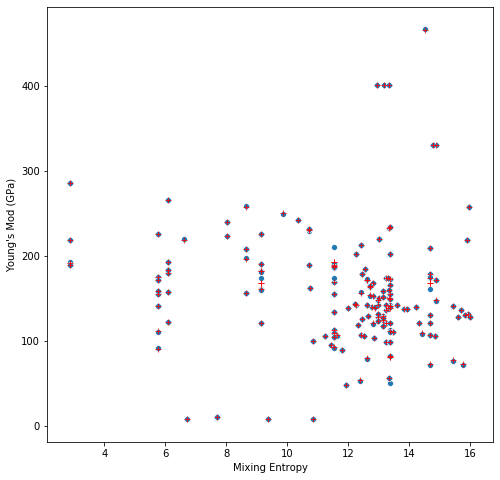

In [41]:
# predicting the results for training set
pred_train = GBR.predict(X_train.iloc[:,1:11])

# Visualizing the prediction
plt.figure(figsize = (8,8))
sns.scatterplot(X_train.iloc[:,10],Y_train)
sns.scatterplot(X_train.iloc[:,10],pred_train, color = 'red', marker = '+')

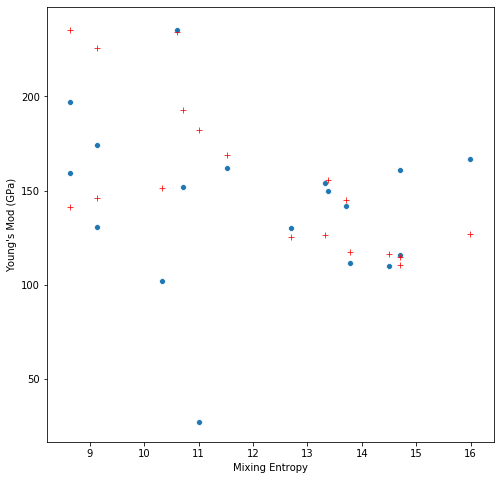

In [43]:
# Prediction for test set
pred_test = GBR.predict(X_test.iloc[:,1:11])

# Visualizing the test results
plt.figure(figsize = (8,8))
sns.scatterplot(X_test.iloc[:,10],Y_test)
sns.scatterplot(X_test.iloc[:,10],pred_test,color = 'red', marker = '+')
plt.show()

In [45]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

# making scorer function
def mae(true,pred):
    return mean_absolute_error(true,pred)
scorer = make_scorer(mae, greater_is_better= False)

# cross validation 
cv_error = cross_validate(GBR, X_train.iloc[:,1:11], Y_train, cv = 5, scoring = scorer)['test_score']
print("The cross validated test score for the training data set is :",round(np.mean(cv_error),4))


The cross validated test score for the training data set is : -34.0633


In [47]:
# Grid Search For Hypermparameter Optimization

from sklearn.model_selection import GridSearchCV

# Defining the grid values
grid_value = {
    'n_estimators' : [100,200,300,400,500,600,700,800,900,1000],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

# Redefining the regressor
reg = GradientBoostingRegressor(random_state= 1)

# Gridsearch
clf = GridSearchCV(reg, grid_value, cv = 5, scoring = scorer)
clf.fit(X_train.iloc[:,1:11],Y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [50]:
print("The best parameter is: ", clf.best_params_)
print("The best score is: ", clf.best_score_)

The best parameter is:  {'learning_rate': 0.3, 'n_estimators': 1000}
The best score is:  -33.87044887509946


In [53]:
# Fitting the optimized model
opt_params = clf.best_params_

opt_gbr = GradientBoostingRegressor(**opt_params, random_state = 1)
opt_gbr.fit(X_train.iloc[:,1:11],Y_train)
opt_pred = opt_gbr.predict(X_test.iloc[:,1:11])

# Error rate
error = mean_absolute_error(Y_test,opt_pred)
print("The Mean Absolute Error for the Test set is :", error)

The Mean Absolute Error for the Test set is : 29.11648788478143


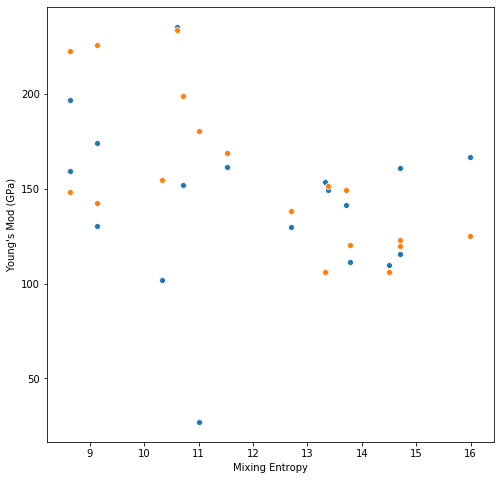

In [54]:
# Visulaizing the result
plt.figure(figsize= (8,8))
sns.scatterplot(X_test.iloc[:,10],Y_test)
sns.scatterplot(X_test.iloc[:,10],opt_pred)
plt.show()